In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math as mt
from scipy.integrate import odeint
import random

def watts_strogatz(N, k, p):
    G = nx.Graph()
    nodes = list(range(N))

    # Anillo inicial
    for i in range(N):
        for j in range(1, k // 2 + 1):
            neighbor = (i + j) % N
            G.add_edge(nodes[i], nodes[neighbor])

    # reconexion de los enlaces con probabilidad p
    for i in range(N):
        for j in range(1, k // 2 + 1):
            if random.random() < p:
                neighbor = (i + j) % N
                potential_neighbors = set(nodes) - {nodes[i]} - set(G.neighbors(nodes[i]))
                if potential_neighbors:
                    new_neighbor = random.choice(list(potential_neighbors))
                    G.remove_edge(nodes[i], nodes[neighbor])
                    G.add_edge(nodes[i], new_neighbor)

    return G


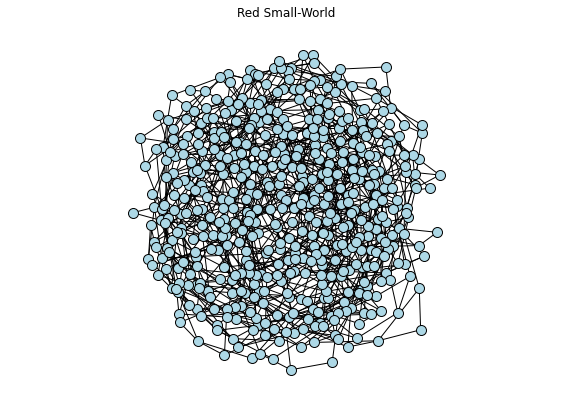

In [12]:
import matplotlib.pyplot as plt

# Parametros
N = 500
k = 4
p = 0.4

graph = watts_strogatz(N, k, p)

# Dibujar la red 
pos = nx.circular_layout(graph)


plt.figure(figsize=(10,7))
plt.title("Red Small-World")
nx.draw_kamada_kawai(graph, with_labels=False, node_color='lightblue', node_size=100, edgecolors='k')
plt.axis('equal')
plt.show()


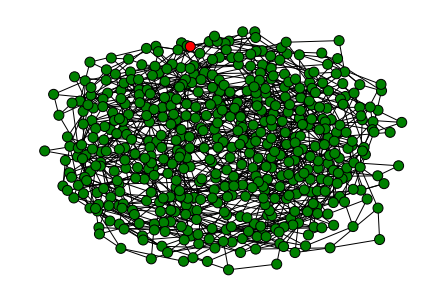

In [13]:
colores=['w' for nodo in graph]
nx.set_node_attributes(graph,'S','P')
nx.set_node_attributes(graph,{np.random.randint(0,len(graph)-1):'I'},'P')
nx.set_node_attributes(graph,0,'Time')

su=0
inf=0
re=0
mu=0
for i in range (0,len(graph)):           #Definición de las poblaciones iniciales y colores representativos
    if(graph.nodes[i]['P']=='S'):
        su+=1
        colores[i]='g'
    if(graph.nodes[i]['P']=='I'):
        inf+=1
        colores[i]='r'
    if(graph.nodes[i]['P']=='R'):
        re+=1
        colores[i]='b'
    if(graph.nodes[i]['P']=='M'):
        mu+=1
        colores[i]='orange'

nx.draw_kamada_kawai(graph, with_labels=False, node_color=colores, node_size=100, edgecolors='k') #Estado inicial

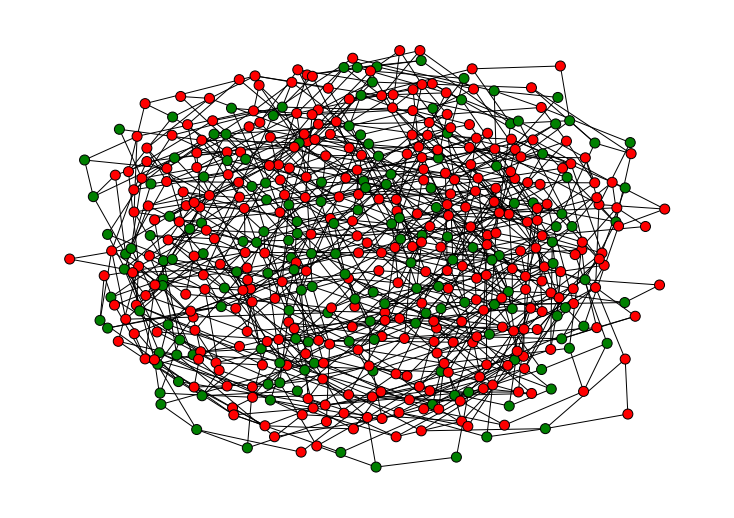

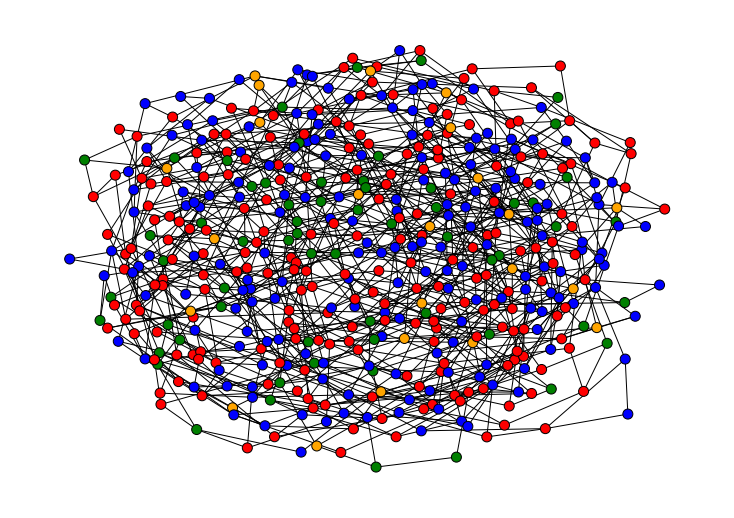

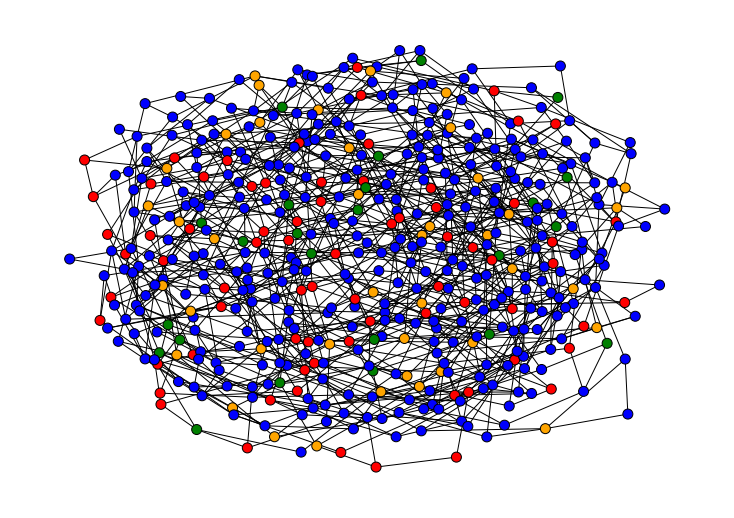

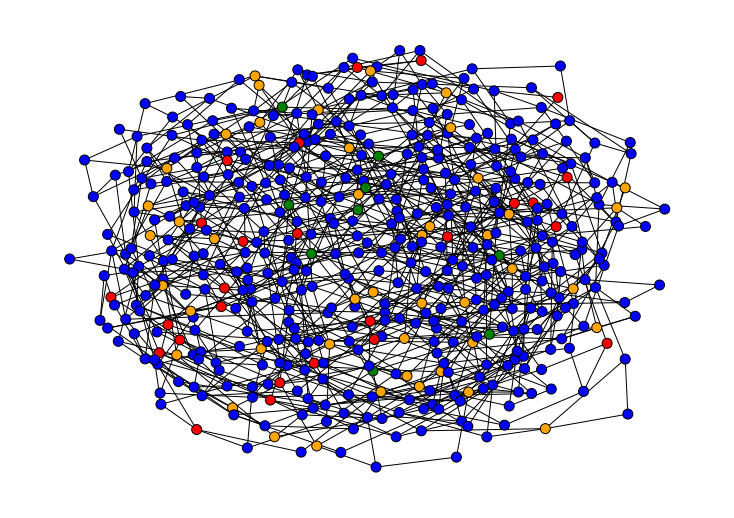

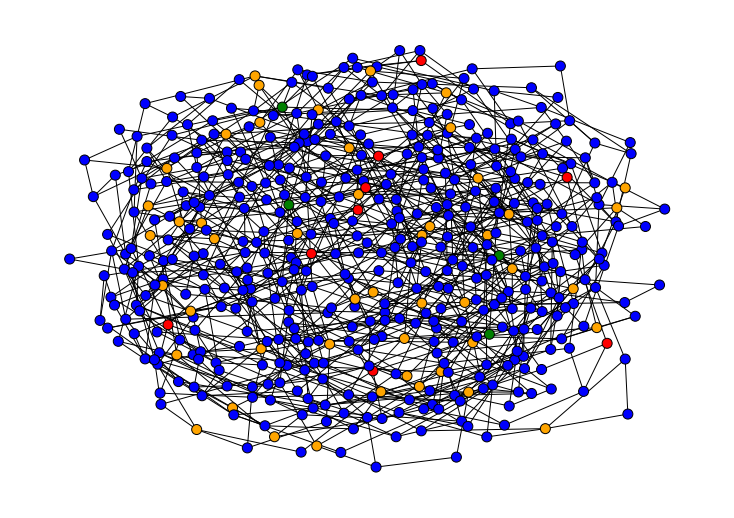

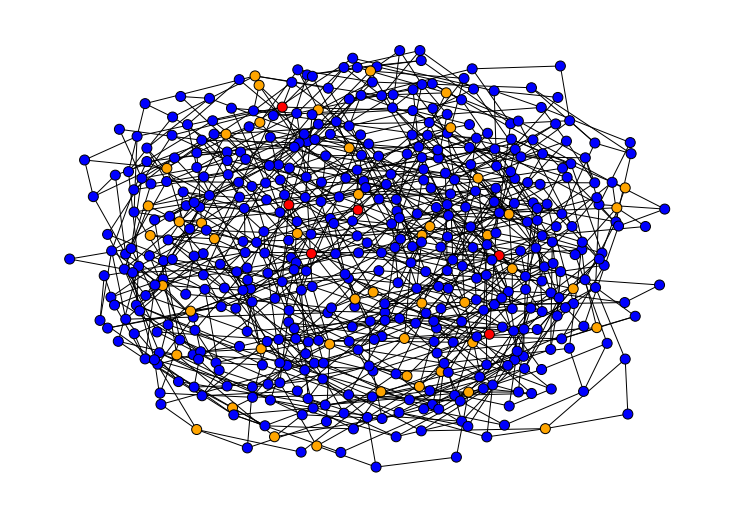

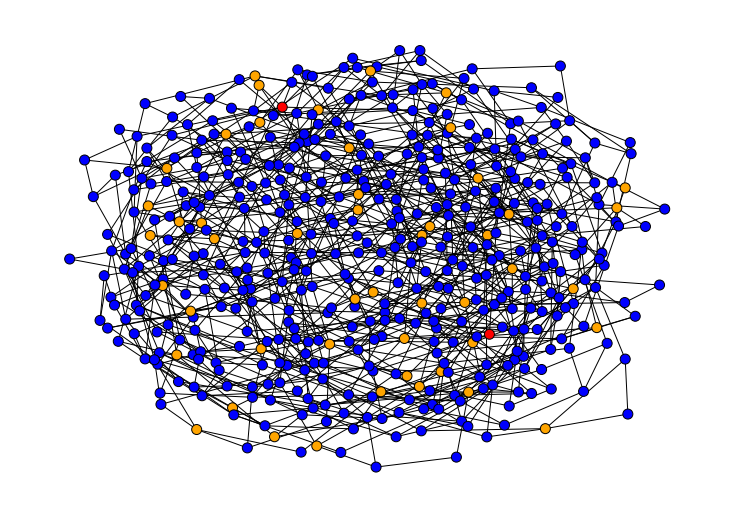

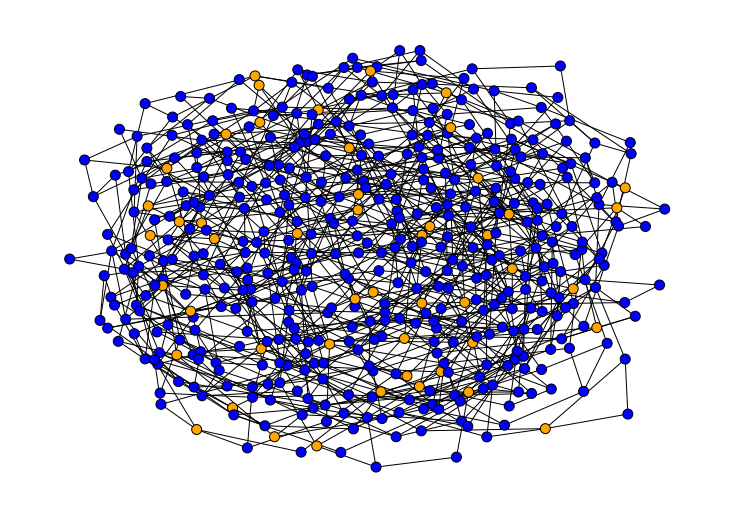

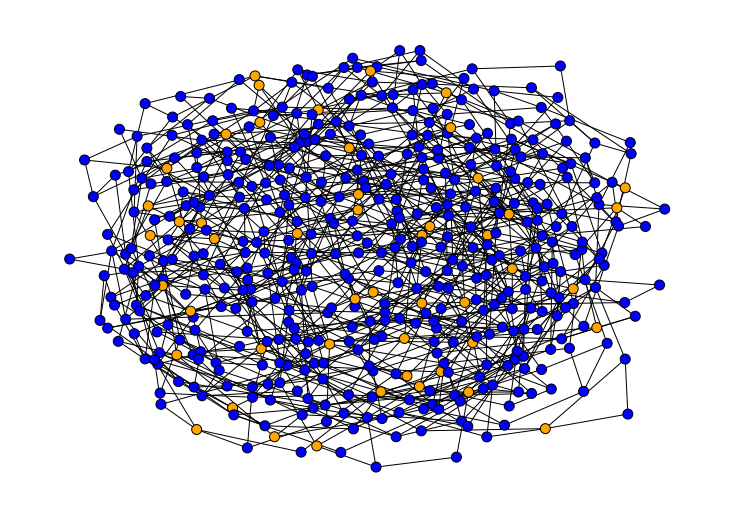

In [14]:
def Cambio(G,su,inf,re,mu,colores):
    for i in range (0,len(G)):
        if(G.nodes[i]['P']=='S'):
            su+=1
            colores[i]='g'
        if(G.nodes[i]['P']=='I'):
            inf+=1
            colores[i]='r'
        if(G.nodes[i]['P']=='R'):
            re+=1
            colores[i]='b'
        if(G.nodes[i]['P']=='M'):
            mu+=1
            colores[i]='orange'
    return G, su, inf, re, mu,colores
beta=0.1
gamma=0.9
Posib=[0,1]
Dat=[0,su,inf,re,mu]
tI=14
td=100
for t in range(1,td):                 #Evolución del sistema en un tiempo td
    for j in range (0,len(graph)):
        if(graph.nodes[j]['P']=='S'):
            A=list(graph.adj[i])
            bl=len(list(graph.adj[j]))
            cl=0
            for al in range (0,bl):
                if(graph.nodes[j]['P']=='I'):
                    cl+=1
                else:
                    cl=1
            prb=1-(1-beta)**(cl)
            b=np.random.choice(Posib,p=[1-prb,prb])
            if(b==1):
                    nx.set_node_attributes(graph,{j:'I'},'P')
        else:
            if(graph.nodes[j]['P']=='I'):
                graph.nodes[j]['Time']+=1
                if(graph.nodes[j]['Time']==tI):
                    b=np.random.choice(Posib,p=[1-gamma,gamma])
                    if(b==1):
                        nx.set_node_attributes(graph,{j:'R'},'P')    
                    else:
                        nx.set_node_attributes(graph,{j:'M'},'P')  
        graph,su,inf,re,mu,colores=Cambio(graph,0,0,0,0,colores)
    fila=t,su,inf,re,mu
    Dat = np.vstack([Dat, fila])
    if(t%10==0):
        plt.figure(figsize=(10,7))
        nx.draw_kamada_kawai(graph, with_labels=False, node_color=colores, node_size=100, edgecolors='k') #Estado fina

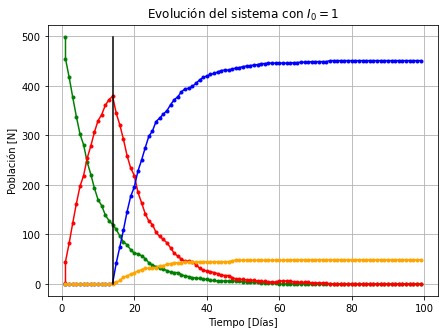

In [15]:

S=np.array([Dat[0][1]])
I=np.array([Dat[0][2]])
R=np.array([Dat[0][3]])
M=np.array([Dat[0][4]])
time=np.array([Dat[1][0]])

for i in range (1,len(Dat)):
    time=np.append(time,Dat[i][0])
    S=np.append(S,Dat[i][1])
    I=np.append(I,Dat[i][2])
    R=np.append(R,Dat[i][3])
    M=np.append(M,Dat[i][4])
    
Ref=np.array([tI])
tal=np.array([0])
for i in range (N):
    Ref=np.append(Ref,14)
    tal=np.append(tal,i)

plt.figure(figsize=(7,5))
plt.plot(time,S, marker='.',color='g')
plt.plot(time,I, marker='.',color='r')
plt.plot(time,R, marker='.',color='b')
plt.plot(time,M, marker='.',color='orange')
plt.plot(Ref,tal,color='black')
plt.xlabel('Tiempo [Días]')
plt.ylabel('Población [N]')
plt.title('Evolución del sistema con $I_0=1$')
plt.grid()
plt.show()